# Week 2 Exercises

In this weeks exercises you will use Numpy/Scipy to impliment some numerical algorithms and then you will use Pandas to perform a rudamentary data analysis using the KDD 98 dataset.  Along the way you will use unix/basic python from the first week as well as git to save your work.

As a first step we import the libraries we'll use later on.  This allows us to use numpy library calls by prefixing the call with np.

In [1]:
#Import the libraries 
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Matrix Manipulations

Lets first create a matrix and perform some manipulations of it.

Using numpy's matrix data structure, define the following matricies:

$$A=\left[ \begin{array}{ccc} 3 & 5 & 9 \\ 3 & 3 & 4 \\ 5 & 9 & 17 \end{array} \right]$$

$$B=\left[ \begin{array}{c} 2 \\ 1 \\ 4 \end{array} \right]$$

### 1.1 After this solve the matrix equation (1):
$$Ax = B$$

### 1.2 Now write three functions for matrix multiply $C=AB$ in each of the following styles (2):

1. By using nested for loops to impliment the naive algorithm ($C_{ij}=\sum_{k=0}^{m-1}A_{ik}B_{kj}$)
2. Using numpy's built in martrix multiplication  
3. Using Cython

The three methods should have the same answer

In [2]:
A=np.matrix('3 5 9; 3 3 4; 5 9 17', dtype=float)
B=np.matrix('2; 1; 4', dtype=float)
x = np.linalg.solve(A, B)
print ('x =', x)

('x =', matrix([[ 1.],
        [-2.],
        [ 1.]]))


In [3]:
def mult_python(A, B):
    if A.shape[1] != B.shape[0]:
        print ("Number of columns of A must equal number of rows of B")
        return None
    C=np.zeros((A.shape[0], B.shape[1]))
    for i in range(A.shape[0]):
        for j in range(B.shape[1]):
            for k in range(A.shape[1]):
                C[i, j] += A[i, k] * B[k, j]
    return C

In [4]:
def mult_numpy(A, B):
    return(np.dot(A, B))

In [5]:
%load_ext cython

In [6]:
%%cython
cimport numpy as np
import numpy as np
def mult_cython(np.ndarray[np.float64_t, ndim=2] A, np.ndarray[np.float64_t, ndim=2] B):
    cdef np.ndarray[np.float64_t, ndim=2] C
    cdef long i, j, k
    C=np.zeros((A.shape[0], B.shape[1]))
    for i in range(A.shape[0]):
        for j in range(B.shape[1]):
            for k in range(A.shape[1]):
                C[i, j] += A[i, k] * B[k, j]
    return C


In [7]:
print 'Python: ', mult_python(A, B)
print 'Numpy: ', mult_numpy(A, B)
print 'Cython: ', mult_cython(A, B)

Python:  [[ 47.]
 [ 25.]
 [ 87.]]
Numpy:  [[ 47.]
 [ 25.]
 [ 87.]]
Cython:  [[ 47.]
 [ 25.]
 [ 87.]]


### 1.3 Now we wish to evaluate the performance of these three methods.  Write a method that given three dmiensions (a,b,c) makes a random a x b and b x c matrix and computes the product using your three functions and reports the speed of each method (1).

After this measure performance of each method for all $a,b,c \in \{10,100,1000,10000\}$ and plot the results.  Is one method always the fastest?  Discuss why this is or is not the case.

([<matplotlib.axis.XTick at 0x1209dd650>,
 <a list of 27 Text xticklabel objects>)

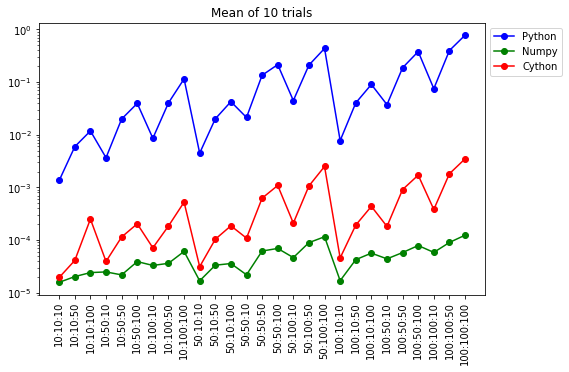

In [24]:
import time

np.random.seed(20171102)

def time_mult(a, b, c):
    A=np.random.uniform(low=-1, high=1, size=(a, b))
    B=np.random.uniform(low=-1, high=1, size=(b, c))
    t1=time.time()
    mult_python(A, B)
    t2=time.time()
    mult_numpy(A, B)
    t3=time.time()
    mult_cython(A, B)
    t4=time.time()
    return np.array([t2-t1, t3-t2, t4-t3])

num_sim=10
m_size=[10, 50, 100]
avg=np.zeros(shape=(num_sim, 3))
result=np.zeros(shape=(len(m_size)**3, 3))
idx=0
labels=[]
for a in m_size:
    for b in m_size:
        for c in m_size:
            labels.append(str(a)+':'+str(b)+':'+str(c))
            for k in range(num_sim):
                avg[k,]=time_mult(a, b, c)
            result[idx] = avg.mean(axis=0)
            idx+=1


plt.figure(figsize=(8, 5))
plt.semilogy(result[:, 0], c='blue', marker='o', label='Python')
plt.semilogy(result[:, 1], c='green', marker='o', label='Numpy')
plt.semilogy(result[:, 2], c='red', marker='o', label='Cython')
plt.title('Mean of %d trials' % num_sim)
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.xticks(range(len(labels)), labels, rotation=90)

**BONUS** Now repeat the past two problems but instead of computing the matrix product, compute a matrix's [determinant](http://en.wikipedia.org/wiki/Determinant).  Measure performance for matricies of various sizes and discuss the results.  Determinant may get impractical to calculate for not too huge of matricies, so no need to goto 1000x1000 matricies. (1)

## 2. IO Exercises

Below is a map of various datatypes in python that you have come across and their corresponding JSON equivalents.

$$Datatypes=\left[ \begin{array}{cc} JSON & Python3 \\ object & dictionary \\ array & list \\ string & string \\ integer	& integer \\ real number & float \\ true & True \\ false & False \\ null & None  \end{array} \right]$$


There are atleast two very important python datatypes missing in the above list. 
Can you find the same?  [list the two mising python datatypes in this markdown cell below] (1)

1. Tuple
2. Set

Now We can save the above map as a dictionary with Key-value pairs (1)
1. create a python dictionary named dataypes, having the above map as the Key-value pairs with Python datatypes as values and JSON equivalents as keys.
2. Save it as a pickle called datatypes and gzip the same.
3. Reload this pickle, and read the file contents and output the data in the following formatted way as given in this example - "The JSON equivalent for the Python datatype Dictionary is Object". Output similarly for the rest of the key-value pairs.
4. Save this data as a JSON but using Python datatypes as keys and JSON equivalent as values this time. 

In [25]:
import pickle
import json
import gzip

datatypes={'object':'dictionary', 'array':'list', 'string':'string', 'integer':'integer',
           'real number':'float', 'true':'True', 'false':'False', 'null':'None'}


pickle.dump(datatypes, open('datatypes.pkl', 'wb'))
pickle.dump(datatypes, gzip.open('datatypes_gzip.pkl', 'wb'))

dt=pickle.load(gzip.open('datatypes_gzip.pkl', 'rb'))
dtjsn={}
for key, value in dt.items():
    print 'The JSON equivalent for the Python datatype %s is %s' % (value, key)
    dtjsn[value]=key

json.dump(dtjsn, gzip.open('datatypes_gzip.jsn', 'wb'))

The JSON equivalent for the Python datatype False is false
The JSON equivalent for the Python datatype string is string
The JSON equivalent for the Python datatype float is real number
The JSON equivalent for the Python datatype dictionary is object
The JSON equivalent for the Python datatype integer is integer
The JSON equivalent for the Python datatype list is array
The JSON equivalent for the Python datatype None is null
The JSON equivalent for the Python datatype True is true


## 3. Pandas Data Analysis
Pandas gives us a nice set of tools to work with columnar data (similar to R's dataframe). 
To learn how to use this it makes the most sense to use a real data set.
For this assignment we'll use the KDD Cup 1998 dataset, which can be sourced from http://kdd.ics.uci.edu/databases/kddcup98/kddcup98.html .


### Acquiring Data
First we pull the README file from the dataset into this notebook via the unix "curl" command.  Remember you can hide/minimize output cells via the button on the left of the output.

In [2]:
!curl http://kdd.ics.uci.edu/databases/kddcup98/epsilon_mirror/readme

+--------------------------------------------------------------------+
| NOTE TO ALL DOWN-LOADERS                                           |
+--------------------------------------------------------------------+

The KDD-CUP-98 data set and the accompanying documentation are now 
available for general use with the following restrictions: 

  (1) The users of the data must notify 

	Ismail Parsa	(iparsa@epsilon.com) and
	Ken Howes	(khowes@epsilon.com) 

  in the event they produce results, visuals or tables, etc. from the 
  data and send a note that includes a summary of the final result. 

  (2) The authors of published and/or unpublished articles that use 
  the KDD-Cup-98 data set must also notify the individuals listed 
  above and send a copy of their published and/or unpublished work. 

  (3) If you intend to use this data set for training or educational
  purposes, you must not reveal the name of the sponsor PVA 
  (Paralyzed Veterans of America) to the trainees or students. Yo

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  4134  100  4134    0     0  66677      0 --:--:-- --:--:-- --:--:-- 66677


As you can see this README describes several files which may be of use.  In particular there are two more documentation files (DOC and DIC) we should read to get an idea of the data format.  Bring these files into the notebook.

In [27]:
!curl http://kdd.ics.uci.edu/databases/kddcup98/epsilon_mirror/cup98doc.txt
!curl http://kdd.ics.uci.edu/databases/kddcup98/epsilon_mirror/cup98dic.txt

Now we wish to download the cup98lrn.zip file and unzip it into a new subdirectory called "data".  
However, since this file is pretty big we don't want to store it on github.  
Luckily git provides the [.gitignore](http://git-scm.com/docs/gitignore) file which allows us to specify files we don't want to put into our git repository.

Please do the following steps:

1. Add the directory "data" to the .gitignore file
2. Commit the new .gitignore file
3. Create a new directory "data"
4. Download http://kdd.ics.uci.edu/databases/kddcup98/epsilon_mirror/cup98lrn.zip into the data directory
5. Unzip the cup98lrn.zip (we will only be using the unzipped version, so feel free to remove the zip file)
6. Run "git status" to show that the data directory is not an untracked file (this indicates it is ignored)

**NOTE:** These steps only need to be run once, it is advised you comment all the lines out by putting a # at the start of each line after they have run.  This will save you time in the future when you have to rerun all cells/don't want to spend a few minutes downloading the data file.

Now perform some basic sanity checks on the data.  Using a combination of unix/basic python answer the following questions (2):

1. How many lines are there?  
2. Is the file character seperated or fixed width format?
3. Is there a header?  If so how many fields are in it?
4. Do all rows have the same number of fields as the header?
5. Does anyhting in 1-4 disagree with the readme file or indicate erroneous data?

In [34]:
#1 determine the line count

line_count = !wc -l data/cup98LRN.txt
print (line_count[0])

   95413 data/cup98LRN.txt


In [35]:
# 2. check if file is fixed width

infile = open('data/cup98LRN.txt', 'r')
first_line_length = None
fixed_width_file = True
for line in infile.readlines():
    if not first_line_length:
        first_line_length = len(line)
    elif first_line_length != len(line):
        print ("Not a fixed width format file\n")
        fixed_width_file = False
        break
infile.close()
if fixed_width_file:
    print ("file is in a fixed width format\n")

Not a fixed width format file



In [45]:
#3 check if a header exists and how many fields are in it
!head -n 2 data/cup98LRN.txt
header_count = !head -1 data/cup98LRN.txt | grep -o "," | wc -w
print 'header count: ', int(header_count[0].strip())+1

ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGE,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,

In [46]:
#4 check if all of the rows have the same number of fields

infile = open('data/cup98LRN.txt', 'r')
count = None
malformed_line_count = 0
for line in infile.readlines():
    current_line_count = len(line.split(','))
    if not count:
        count = current_line_count
    elif current_line_count != count:
        malformed_line_count += 1
if malformed_line_count == 0:
    print ("\n#4 yes, all lines are equal")
else:
    print ("\n#4 no, all lines ARE NOT equal")
infile.close()



#4 yes, all lines are equal


Give answers to questions 1-4 in this markdown cell:

1. 95413 lines
2. character separated using a comma
3. Yes there is a header
4. Yes, all lines are equal


Now load the data file into a pandas data frame called "learn".  To save some time, we've loaded the data dictionary into col_types.  

### 6. Finally split learn into two data frames, learn_y: the targets (two columns described in the documentation) and learn_x: the predictors (everything but the targets) (1)

In [11]:
dict_file = open("dict.dat")
col_types = [ (x.split("\t")[0], x.strip().split("\t")[1]) for x in dict_file.readlines() ]

In [49]:
learn = pd.read_csv('data/cup98LRN.txt', low_memory=False)
learn_x = learn[['TARGET_B', 'TARGET_D']]
learn_y = learn.drop(['TARGET_B', 'TARGET_D'], axis=1)

### 7. Summarizing Data (1)
Now that we have loaded data into the learn table, we wish to to summarize the data.  
Write a function called summary which takes a pandas data frame and prints a summary of each column containing the following:

If the column is numeric:

1. Mean
2. Standard Deviation
3. Min/Max
4. Number of missing values (NaN, Inf, NA)

If the column is non alphabetical:

1. Number of distinct values
2. Number of missing values (NaN, INF, NA, blank/all spaces)
3. The frequency of the 3 most common values and 3 least common values

Format the output to be human readable.

For example:
> Field_1  
> mean: 50  
> std_dev: 25  
> min: 0  
> max: 100  
> missing: 5
>  
> Field_2  
> distinct_values: 100  
> missing: 10  
>  
> 3 most common:  
>   the: 1000  
>   cat: 950  
>   meows: 900  
>  
> 3 least common:  
>   dogs: 5  
>   lizards: 4  
>   eggs: 1  

In [55]:
 def summary(df):
    numeric = df._get_numeric_data()
    mean_result = df.mean(numeric_only=True)
    std_dev_result = df.std(numeric_only=True)
    min_result = df.min(numeric_only=True)
    max_result = df.max(numeric_only=True)
    
    for field in df:
        print (field)
        if field in numeric:
            print ("mean: %d" % mean_result[field])
            print ("std_dev: %d" % std_dev_result[field])
            print ("min: %d" % min_result[field])
            print ("max: %d" % max_result[field])
            print ("missing: %d" % (np.isinf(df[field]) | df[field].isnull()).sum())
        else:
            print ("distinct_values: %d" % df[field].nunique())
            print ("missing: %d\n" % (df[field].apply(lambda x: x == np.inf or x == -np.inf or str(x).strip() == '') | df[field].isnull()).sum())
            print ("3 most common:")
            cleaned_data = df.loc[df[field].apply(lambda x: x != np.inf and x != -np.inf and str(x).strip() != ''),field].dropna()
            value_counts = cleaned_data.value_counts()
            print (value_counts.head(3))
            print ("\n 3 least common:")
            print (value_counts.tail(3))
        print ("")

summary(learn)

ODATEDW
mean: 9141
std_dev: 343
min: 8306
max: 9701
missing: 0

OSOURCE
distinct_values: 896
missing: 928

3 most common:
MBC    4539
SYN    3563
AML    3430
Name: OSOURCE, dtype: int64

 3 least common:
SNU    1
MAS    1
TLL    1
Name: OSOURCE, dtype: int64

TCODE
mean: 54
std_dev: 953
min: 0
max: 72002
missing: 0

STATE
distinct_values: 57
missing: 0

3 most common:
CA    17343
FL     8376
TX     7535
Name: STATE, dtype: int64

 3 least common:
DE    3
AS    1
DC    1
Name: STATE, dtype: int64

ZIP
distinct_values: 19938
missing: 0

3 most common:
85351    61
92653    59
85710    54
Name: ZIP, dtype: int64

 3 least common:
73117     1
61732     1
90731-    1
Name: ZIP, dtype: int64

MAILCODE
distinct_values: 2
missing: 94013

3 most common:
B    1399
Name: MAILCODE, dtype: int64

 3 least common:
B    1399
Name: MAILCODE, dtype: int64

PVASTATE
distinct_values: 3
missing: 93954

3 most common:
P    1453
E       5
Name: PVASTATE, dtype: int64

 3 least common:
P    1453
E       5
Nam

missing: 93384

3 most common:
Y    2028
Name: BOATS, dtype: int64

 3 least common:
Y    2028
Name: BOATS, dtype: int64

WALKER
distinct_values: 2
missing: 84911

3 most common:
Y    10501
Name: WALKER, dtype: int64

 3 least common:
Y    10501
Name: WALKER, dtype: int64

KIDSTUFF
distinct_values: 2
missing: 93876

3 most common:
Y    1536
Name: KIDSTUFF, dtype: int64

 3 least common:
Y    1536
Name: KIDSTUFF, dtype: int64

CARDS
distinct_values: 2
missing: 94371

3 most common:
Y    1041
Name: CARDS, dtype: int64

 3 least common:
Y    1041
Name: CARDS, dtype: int64

PLATES
distinct_values: 2
missing: 94852

3 most common:
Y    560
Name: PLATES, dtype: int64

 3 least common:
Y    560
Name: PLATES, dtype: int64

LIFESRC
distinct_values: 4
missing: 54032

3 most common:
2    20027
3    11479
1     9874
Name: LIFESRC, dtype: int64

 3 least common:
2    20027
3    11479
1     9874
Name: LIFESRC, dtype: int64

PEPSTRFL
distinct_values: 2
missing: 50143

3 most common:
X    45269
Name: 

missing: 0

MC1
mean: 48
std_dev: 15
min: 0
max: 99
missing: 0

MC2
mean: 50
std_dev: 16
min: 0
max: 99
missing: 0

MC3
mean: 12
std_dev: 10
min: 0
max: 99
missing: 0

TPE1
mean: 76
std_dev: 13
min: 0
max: 99
missing: 0

TPE2
mean: 12
std_dev: 6
min: 0
max: 99
missing: 0

TPE3
mean: 2
std_dev: 5
min: 0
max: 99
missing: 0

TPE4
mean: 1
std_dev: 4
min: 0
max: 99
missing: 0

TPE5
mean: 0
std_dev: 2
min: 0
max: 71
missing: 0

TPE6
mean: 0
std_dev: 0
min: 0
max: 47
missing: 0

TPE7
mean: 0
std_dev: 0
min: 0
max: 25
missing: 0

TPE8
mean: 4
std_dev: 5
min: 0
max: 99
missing: 0

TPE9
mean: 3
std_dev: 3
min: 0
max: 99
missing: 0

PEC1
mean: 2
std_dev: 6
min: 0
max: 99
missing: 0

PEC2
mean: 18
std_dev: 19
min: 0
max: 99
missing: 0

TPE10
mean: 19
std_dev: 6
min: 0
max: 90
missing: 0

TPE11
mean: 23
std_dev: 6
min: 0
max: 76
missing: 0

TPE12
mean: 5
std_dev: 5
min: 0
max: 99
missing: 0

TPE13
mean: 60
std_dev: 17
min: 0
max: 99
missing: 0

LFC1
mean: 64
std_dev: 13
min: 0
max: 99
missing: 0

L

L1F    30380
L1G    12384
L2F    10961
Name: RFA_2, dtype: int64

 3 least common:
L4F    2100
L3G    1503
L4G     915
Name: RFA_2, dtype: int64

RFA_3
distinct_values: 71
missing: 1950

3 most common:
A1F    21950
A1G     9184
A2F     6283
Name: RFA_3, dtype: int64

 3 least common:
A2C    1
S3B    1
N1C    1
Name: RFA_3, dtype: int64

RFA_4
distinct_values: 64
missing: 2312

3 most common:
A1F    21818
A1G     9098
A2F     6264
Name: RFA_4, dtype: int64

 3 least common:
S4B    2
A3C    2
S3B    1
Name: RFA_4, dtype: int64

RFA_5
distinct_values: 41
missing: 33590

3 most common:
A1F    11027
A1G     8393
A2F     6029
Name: RFA_5, dtype: int64

 3 least common:
L3G    13
L4F    13
N2E     5
Name: RFA_5, dtype: int64

RFA_6
distinct_values: 109
missing: 3557

3 most common:
A1F    15696
F1F     6704
A1G     6634
Name: RFA_6, dtype: int64

 3 least common:
P1A    1
A3B    1
A2B    1
Name: RFA_6, dtype: int64

RFA_7
distinct_values: 106
missing: 8874

3 most common:
A1F    10954
A1E    

3 most common:
L    95412
Name: RFA_2R, dtype: int64

 3 least common:
L    95412
Name: RFA_2R, dtype: int64

RFA_2F
mean: 1
std_dev: 1
min: 1
max: 4
missing: 0

RFA_2A
distinct_values: 4
missing: 0

3 most common:
F    46964
E    21639
G    19397
Name: RFA_2A, dtype: int64

 3 least common:
E    21639
G    19397
D     7412
Name: RFA_2A, dtype: int64

MDMAUD_R
distinct_values: 5
missing: 0

3 most common:
X    95118
C      109
L       70
Name: MDMAUD_R, dtype: int64

 3 least common:
L    70
D    65
I    50
Name: MDMAUD_R, dtype: int64

MDMAUD_F
distinct_values: 4
missing: 0

3 most common:
X    95118
1      187
2       87
Name: MDMAUD_F, dtype: int64

 3 least common:
1    187
2     87
5     20
Name: MDMAUD_F, dtype: int64

MDMAUD_A
distinct_values: 5
missing: 0

3 most common:
X    95118
C      249
L       23
Name: MDMAUD_A, dtype: int64

 3 least common:
L    23
M    17
T     5
Name: MDMAUD_A, dtype: int64

CLUSTER2
mean: 31
std_dev: 18
min: 1
max: 62
missing: 132

GEOCODE2
distinct

 ## 4. Pandas analysis on Calit2 data 

Import data from http://archive.ics.uci.edu/ml/machine-learning-databases/event-detection/CalIt2.data using curl

This data comes from the main door of the CalIt2 building at UCI. Observations come from 2 data streams (people flow in and out of the building), over 15 weeks, 48 time slices per day (half hour count aggregates).

Attribute Information:
1. Flow ID: 7 is out flow, 9 is in flow
2. Date: MM/DD/YY
3. Time: HH:MM:SS
4. Count: Number of counts reported for the previous half hour


In [59]:
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/event-detection/CalIt2.data > CalIt2.data

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  218k  100  218k    0     0   199k      0  0:00:01  0:00:01 --:--:-- 2948k


### Selecting Data (1) ####
1. Select all data for the date July 24 2005 having flow id=7. Also output the row count of results 
2. Select all rows whose count is greater than 5. Sort the result on count in descending order and output the top 10 rows

In [63]:
cal_id_data = pd.read_csv('CalIt2.data', low_memory=False, header=None)
cal_id_data.columns = ['Flow_ID', 'Date', 'Time', 'Count']
rows = cal_id_data[(cal_id_data['Date'] == '07/24/05') & (cal_id_data['Flow_ID'] == 7)]
print len(rows)

rows_filtered = cal_id_data[cal_id_data['Count'] > 5].sort_values('Count', ascending=False)[0:10]
print (rows2)

48
      Flow_ID      Date      Time  Count
6879        9  10/03/05  15:30:00     62
335         9  07/27/05  11:30:00     61
6881        9  10/03/05  16:00:00     55
9686        7  11/01/05  21:30:00     54
9682        7  11/01/05  20:30:00     54
9681        9  11/01/05  20:00:00     53
6878        7  10/03/05  15:30:00     52
9933        9  11/04/05  11:00:00     50
8913        9  10/24/05  20:00:00     50
3615        9  08/30/05  15:30:00     50


### Apply function (1) ####
1. For the 10 rows outputted above, use Pandas Apply function to subtract lowest value of the 10 from all of them and then output the average value of the resulting counts
2. On the entire data, use apply function to sum all counts with flow_id=9 and date is 07/24/05

In [64]:
rows_filtered.Count.apply(lambda x: x - rows2.Count.min()).mean()

4.1

In [65]:
import datetime

def select(row):
    if row['Date'] == '07/24/05' and row['Flow_ID'] == 9:
        return True
    else:
        return False

print (cal_id_data[cal_id_data.apply(lambda x: select(x), axis=1)].apply(np.sum)['Count'])

16


#### Indexing an Selecting (2) ####
Exlain the following

1. loc: This is label based indexing. Used when all indexes are label indexes are known.
2. iloc: This is position based indexing. Used when indexes are integers or when you don't know the labels and need to access data based on position.
3. ix: Usually tries to behave like loc but falls back to behaving like iloc if the label is not in the index. Deprecated.
4. at: Fast version of loc, used when you want to access a scalar value (single element). Whereas loc would be used to access multiple values.
5. iat: Fast version of iloc, used when you want to access a scalar value (single element). Whereas loc would be used to access multiple values.

Highlight the differences by providing usecases where one is more useful than the other


Write a function to take two dates as input and return all flow ids and counts in that date range having both the dates inclusive. You can use pandas to_datetime function to convert the date to pandas datetime format 

In [ ]:
date_range_df = cal_id_data
date_range_df['Date'] = pd.to_datetime(date_range_df['Date'])
date_range_df = date_range_df.set_index(['Date'])



start_date = '2005-07-01'
end_date = '2005-07-30'


def display_range(date1, date2):
    print date_range_df.loc[date1:date2,['Flow_ID', 'Count']].head()
        
    
display_range(start_date, end_date)

### Grouping (1) ####
1. Select data in the month of August 2005 having flow id=7
2. Group the data based on date and get the max count per date

In [66]:
g1 = cal_id_data[(cal_id_data['Flow_ID'] == 7) & (cal_id_data.Date.str.startswith('08')) & (cal_id_data.Date.str.endswith('05'))]
print (g1)

      Flow_ID      Date      Time  Count
768         7  08/01/05  00:00:00      1
770         7  08/01/05  00:30:00      0
772         7  08/01/05  01:00:00      0
774         7  08/01/05  01:30:00      0
776         7  08/01/05  02:00:00      0
778         7  08/01/05  02:30:00      0
780         7  08/01/05  03:00:00      0
782         7  08/01/05  03:30:00      0
784         7  08/01/05  04:00:00      0
786         7  08/01/05  04:30:00      0
788         7  08/01/05  05:00:00      0
790         7  08/01/05  05:30:00      0
792         7  08/01/05  06:00:00      0
794         7  08/01/05  06:30:00      0
796         7  08/01/05  07:00:00      1
798         7  08/01/05  07:30:00      2
800         7  08/01/05  08:00:00      6
802         7  08/01/05  08:30:00      0
804         7  08/01/05  09:00:00      2
806         7  08/01/05  09:30:00      6
808         7  08/01/05  10:00:00      5
810         7  08/01/05  10:30:00      8
812         7  08/01/05  11:00:00      7
814         7  0

In [73]:
g2 = g1.groupby('Date')['Count']
print (g2.max())

Date
08/01/05    18
08/02/05    16
08/03/05    26
08/04/05    40
08/05/05    17
08/06/05     8
08/07/05     3
08/08/05    16
08/09/05    19
08/10/05    25
08/11/05    16
08/12/05    21
08/13/05     5
08/14/05     3
08/15/05    17
08/16/05    24
08/17/05    22
08/18/05    39
08/19/05    23
08/20/05     3
08/21/05     4
08/22/05    23
08/23/05    25
08/24/05    17
08/25/05    24
08/26/05    22
08/27/05     3
08/28/05     7
08/29/05    15
08/30/05    47
08/31/05    19
Name: Count, dtype: int64


### Stacking, Unstacking (1) ####
1. Stack the data with count and flow_id as indexes
2. Use reset_index to reset the stacked hierarchy by 1 level. The index then will just be the counts

In [74]:
stack1 = cal_id_data.set_index(['Count', 'Flow_ID']).stack()
print (stack1)

Count  Flow_ID      
0      7        Date    07/24/05
                Time    00:00:00
       9        Date    07/24/05
                Time    00:00:00
1      7        Date    07/24/05
                Time    00:30:00
0      9        Date    07/24/05
                Time    00:30:00
       7        Date    07/24/05
                Time    01:00:00
       9        Date    07/24/05
                Time    01:00:00
       7        Date    07/24/05
                Time    01:30:00
       9        Date    07/24/05
                Time    01:30:00
       7        Date    07/24/05
                Time    02:00:00
       9        Date    07/24/05
                Time    02:00:00
2      7        Date    07/24/05
                Time    02:30:00
0      9        Date    07/24/05
                Time    02:30:00
       7        Date    07/24/05
                Time    03:00:00
       9        Date    07/24/05
                Time    03:00:00
       7        Date    07/24/05
                Time  

In [75]:
stack2 = stack1.reset_index(level=1)
print (stack2.head())

            Flow_ID         0
Count                        
0     Date        7  07/24/05
      Time        7  00:00:00
      Date        9  07/24/05
      Time        9  00:00:00
1     Date        7  07/24/05


### Pandas and Matplotlib (1)
Plot a histogram of date vs total counts for flow_id=7 and flow_id=9 for the month of July 2005

Flow_ID,7,9
datef,,
2005-07-24,25,16
2005-07-25,162,176
2005-07-26,220,217
2005-07-27,230,247
2005-07-28,244,271
2005-07-29,220,233
2005-07-30,15,9
2005-07-31,24,9


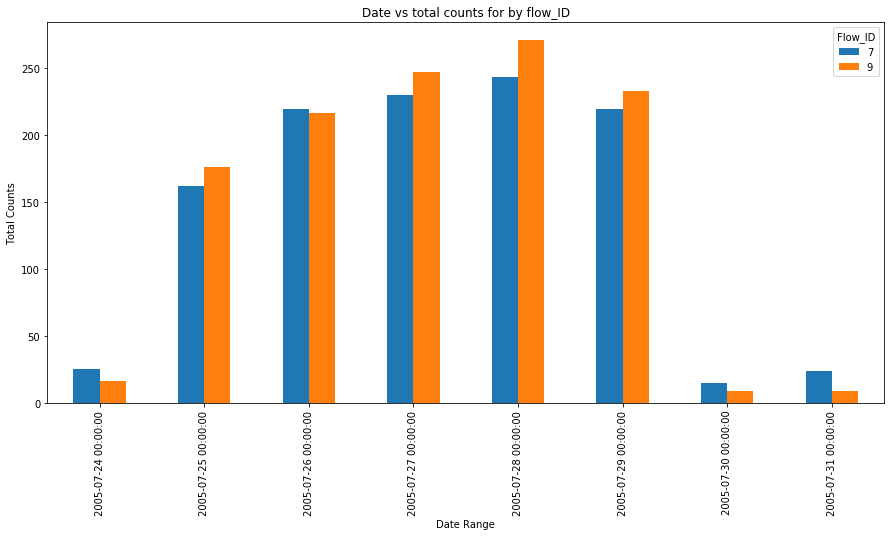

In [78]:
cal_id_data['datef']=pd.to_datetime(cal_id_data['Date'])
sub_df = cal_id_data.groupby(['datef','Flow_ID'])['Count'].sum().unstack()
ax = sub_df['2005-07':'2005-07'].plot(kind='bar',stacked=False,figsize=(15, 7),title='Date vs total counts for by flow_ID')
ax.set_xlabel("Date Range")
ax.set_ylabel("Total Counts")
sub_df['2005-07':'2005-07']